In [1]:
import tensorflow as tf
#tf.set_random_seed(7)
print ("TensorFlow version: " + tf.__version__)

TensorFlow version: 1.12.0


In [2]:
import keras

Using TensorFlow backend.


In [3]:
from mlxtend.data import loadlocal_mnist
from sklearn.model_selection import train_test_split

files = {
    "X": "data/train-images-idx3-ubyte",
    "y": "data/train-labels-idx1-ubyte",
    "X_test": "data/t10k-images-idx3-ubyte",
    "y_test": "data/t10k-labels-idx1-ubyte"
}


# Code to load the binary files.
# https://github.com/rasbt/mlxtend/blob/master/mlxtend/data/local_mnist.py

X, y = loadlocal_mnist(images_path = files['X'], labels_path = files['y'])
X_test, y_test = loadlocal_mnist(images_path = files['X_test'], labels_path = files['y_test'])

In [4]:
X = X.reshape(X.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(45000, 28, 28, 1)
(15000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
import numpy as np
np.random.seed(1337)
def one_hot_encode(data):
    encoded_data = np.zeros((data.shape[0], 10), dtype=np.float32)
    for index, digit in enumerate(data):
        encoded_data[(index, digit)] = 1
    return encoded_data

    
encoded_y_train = one_hot_encode(y_train)
encoded_y_valid = one_hot_encode(y_valid)
encoded_y_test = one_hot_encode(y_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras import optimizers


p = {
    'lr': (0.0001, 0.001, 0.01),
    'batch_size': (32, 64, 128),
}

result = {
    'params' : [],
    'training_acc' : [],
    'val_acc' : [],
    'training_loss': [],
    'val_loss': []
}

# create model
#def talos_model(X_train, y_train, X_valid, y_valid, params):
best_lr = 0
best_bs = 0
best_val_acc = 0
bestmodel = None

for learning_rate in p['lr']:
    for bs in p['batch_size']:
        print('lr = {} batch_size = {}'.format(learning_rate, bs))
        model = Sequential()
        model.add(Conv2D(28, kernel_size = 3, activation = 'relu', input_shape =(28, 28, 1)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(10, activation = 'softmax', kernel_initializer='random_uniform',bias_initializer='zeros'))

        opti = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

        model.compile(optimizer = opti, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        hist = model.fit(X_train, encoded_y_train, validation_data = (X_valid, encoded_y_valid), batch_size = bs, epochs = 10)
        result['val_acc'].append(hist.history['val_acc'])
        result['training_acc'].append(hist.history['acc'])
        result['val_loss'].append(hist.history['val_loss'])
        result['training_loss'].append(hist.history['loss'])
        result['params'].append('{}-{}'.format(learning_rate, bs))
        
        curr_acc = max(hist.history['val_acc'])
        print(curr_acc)
        print()
        if(curr_acc > best_val_acc):
            best_val_acc = curr_acc
            best_lr = learning_rate
            best_bs = bs
            bestmodel = model
            
print('Best hyperpaframeters')
print('Learning rate {}'.format(best_lr))
print('Batch size {}'.format(best_bs))
print('Dropout {}'.format(best_dr))
print('Validation accuracy {}'.format(best_val_acc))
#encoded_y= one_hot_encode(y)
#t = ta.Scan(x=X,y=encoded_y,model=talos_model,val_split = 0.25,grid_downsample=0.01, params=p)#,save_best_model = True)
#model.fit(X_train, encoded_y_train, validation_data = (X_valid, encoded_y_valid),batch_size=params['batch_size'], epochs = 3)

lr = 0.0001 batch_size = 32
Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 15s 340us/step - loss: 0.6865 - acc: 0.8225 - val_loss: 0.1621 - val_acc: 0.9528
Epoch 2/10
45000/45000 [==============================] - 15s 331us/step - loss: 0.2305 - acc: 0.9315 - val_loss: 0.1054 - val_acc: 0.9707
Epoch 3/10
45000/45000 [==============================] - 15s 332us/step - loss: 0.1561 - acc: 0.9535 - val_loss: 0.0919 - val_acc: 0.9736
Epoch 4/10
45000/45000 [==============================] - 15s 331us/step - loss: 0.1206 - acc: 0.9634 - val_loss: 0.0763 - val_acc: 0.9775
Epoch 5/10
45000/45000 [==============================] - 15s 333us/step - loss: 0.0946 - acc: 0.9703 - val_loss: 0.0687 - val_acc: 0.9802
Epoch 6/10
45000/45000 [==============================] - 15s 332us/step - loss: 0.0790 - acc: 0.9752 - val_loss: 0.0639 - val_acc: 0.9825
Epoch 7/10
45000/45000 [==============================] - 15s 330us/step - loss: 0.0708 

45000/45000 [==============================] - 8s 177us/step - loss: 0.0841 - acc: 0.9746 - val_loss: 0.0718 - val_acc: 0.9813
Epoch 7/10
45000/45000 [==============================] - 8s 179us/step - loss: 0.0755 - acc: 0.9763 - val_loss: 0.0702 - val_acc: 0.9815
Epoch 8/10
45000/45000 [==============================] - 8s 180us/step - loss: 0.0707 - acc: 0.9769 - val_loss: 0.0668 - val_acc: 0.9822
Epoch 9/10
45000/45000 [==============================] - 8s 177us/step - loss: 0.0660 - acc: 0.9791 - val_loss: 0.0620 - val_acc: 0.9835
Epoch 10/10
45000/45000 [==============================] - 8s 178us/step - loss: 0.0577 - acc: 0.9818 - val_loss: 0.0641 - val_acc: 0.9852
0.9852

lr = 0.01 batch_size = 32
Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 16s 351us/step - loss: 13.7680 - acc: 0.1454 - val_loss: 14.4826 - val_acc: 0.1015
Epoch 2/10
45000/45000 [==============================] - 15s 337us/step - loss: 13.6589 - acc:

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = bestmodel.predict(X_test)


In [ ]:
y_pred[:10]
op = np.unravel_index(np.argmax(y_pred, axis=1), y_pred.shape)

In [9]:
result

{'params': ['0.0001-32',
  '0.0001-64',
  '0.0001-128',
  '0.001-32',
  '0.001-64',
  '0.001-128',
  '0.01-32',
  '0.01-64',
  '0.01-128'],
 'training_acc': [[0.8225111111111111,
   0.9314666666666667,
   0.9535333333333333,
   0.9633555555555555,
   0.9703333333333334,
   0.9751777777777778,
   0.9772,
   0.9826666666666667,
   0.9824222222222222,
   0.9856222222222222],
  [0.7912666666666667,
   0.9180222222222222,
   0.9418444444444445,
   0.9533111111111111,
   0.9635555555555556,
   0.9677777777777777,
   0.9727111111111111,
   0.9763333333333334,
   0.9781555555555556,
   0.9793555555555555],
  [0.7572888888888889,
   0.8979555555767483,
   0.9235555555237664,
   0.937488888920678,
   0.9490222221798367,
   0.9559555555237664,
   0.960177777756585,
   0.9648888888570998,
   0.9699333333227369,
   0.971644444433848],
  [0.8661333333333333,
   0.9507333333333333,
   0.9613555555555555,
   0.9676222222222223,
   0.9711555555555555,
   0.9726888888888889,
   0.9745777777777778,
   0.

In [11]:
import json
with open('data.json', 'w') as outfile:
    json.dump(result, outfile)

In [50]:
with open('data.json') as f:
    result = json.load(f)

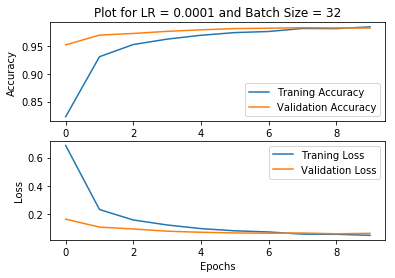

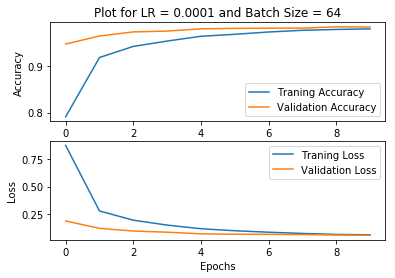

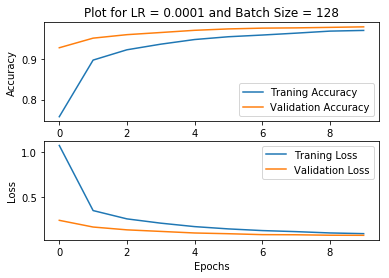

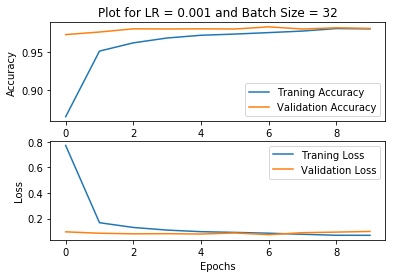

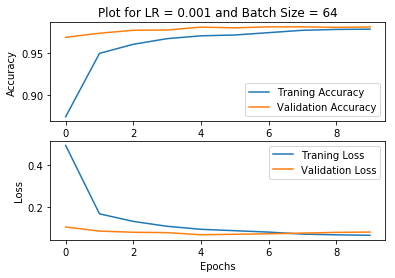

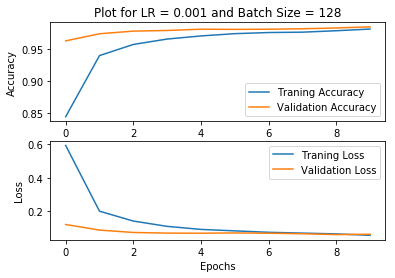

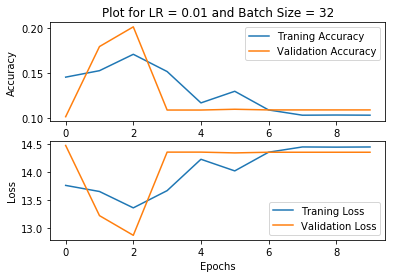

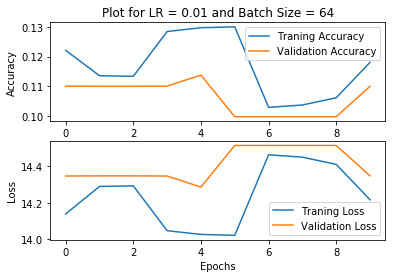

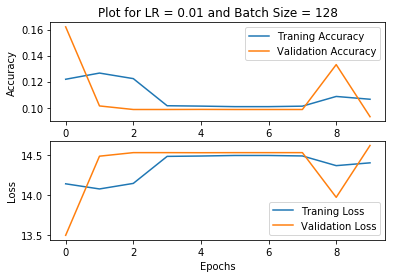

<Figure size 432x288 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt

for index, param in enumerate(result['params']):
    params = param.split('-')
    plt.subplot(2, 1, 1)
    plt.plot(result['training_acc'][index], label = 'Traning Accuracy')
    plt.plot(result['val_acc'][index], label = 'Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.title('Plot for LR = {} and Batch Size = {}'.format(params[0], params[1]))
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(result['training_loss'][index], label = 'Traning Loss')
    plt.plot(result['val_loss'][index], label = 'Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.savefig('{}.png'.format(param))
    plt.show()
    plt.clf()  

In [58]:
def plotFor(p, position):
    plt.figure(figsize= (8, 20))
    for index, param in enumerate(result['params']):
        params = param.split('-')
        param_names = ['LR', 'Batch Size']
        other_param = 1 if position == 0 else 0
        if (p == params[position]):
            plt.subplot(4, 1, 1)
            plt.plot(result['training_acc'][index], label = params[other_param])
            plt.ylabel('Training Accuracy')
            plt.title('Plot for {} - {}'.format(param_names[position], params[position]))
            plt.legend()

            plt.subplot(4, 1, 2)
            plt.plot(result['val_acc'][index], label = params[other_param])
            plt.ylabel('Validation Accuracy')
            plt.xlabel('Epochs')
            plt.legend()
            
            plt.subplot(4, 1, 3)
            plt.plot(result['training_loss'][index], label = params[other_param])
            plt.ylabel('Training Loss')
            plt.xlabel('Epochs')
            plt.legend()
            
            plt.subplot(4, 1, 4)
            plt.plot(result['val_loss'][index], label = params[other_param])
            plt.ylabel('Valdiation Loss')
            plt.xlabel('Epochs')
            plt.legend()

    plt.savefig('{}-{}.png'.format(param_names[position], params[position]))
    plt.show()
    

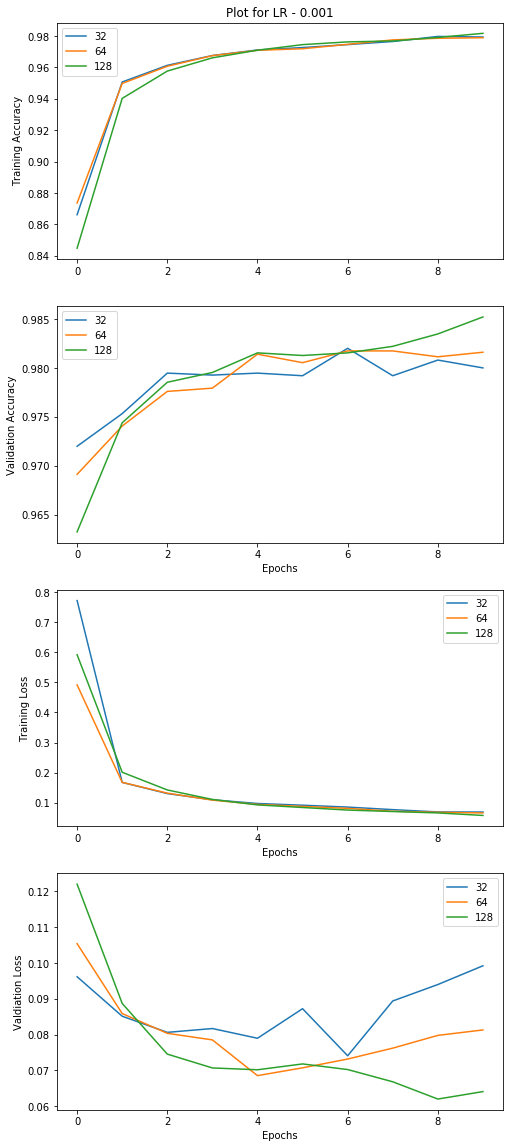

In [59]:
plotFor('0.001', 0)

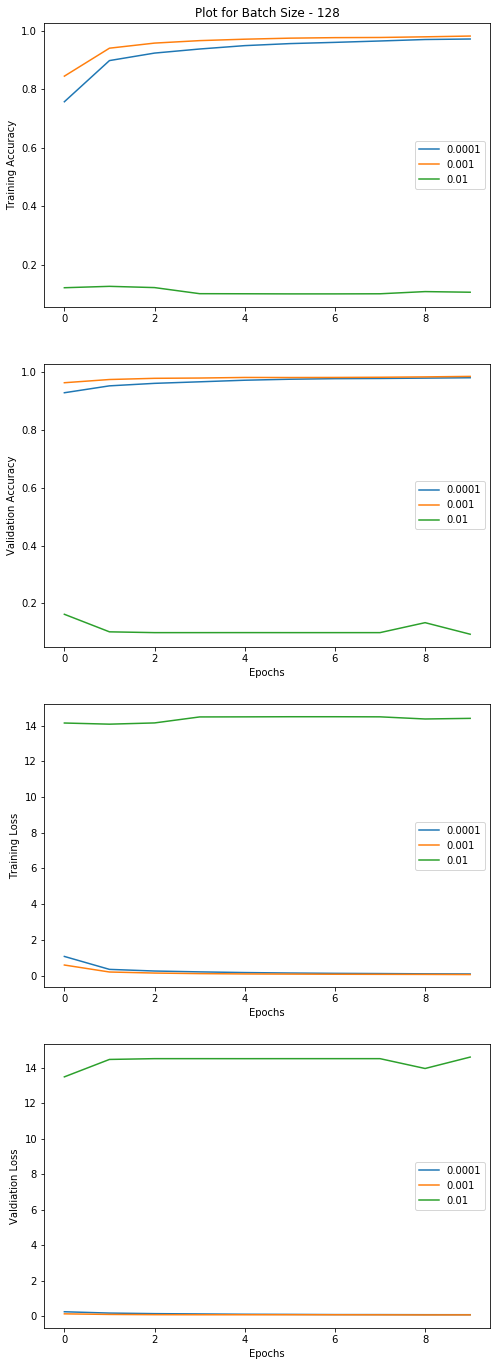

In [57]:
plotFor('128', 1)

In [60]:
result = {
    'params' : [],
    'training_acc' : [],
    'val_acc' : [],
    'training_loss': [],
    'val_loss': []
}

for activation_function in ['tanh', 'sigmoid', 'relu']:
    print('Activation function: {}'.format(activation_function))
    model = Sequential()
    model.add(Conv2D(28, kernel_size = 3, activation = 'relu', input_shape =(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(Flatten())
    model.add(Dense(128, activation=activation_function))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='random_uniform',bias_initializer='zeros'))
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    hist = model.fit(X_train, encoded_y_train, validation_data = (X_valid,encoded_y_valid),batch_size=128, epochs = 10)
    result['val_acc'].append(hist.history['val_acc'])
    result['training_acc'].append(hist.history['acc'])
    result['val_loss'].append(hist.history['val_loss'])
    result['training_loss'].append(hist.history['loss'])
    result['params'].append('g-{}'.format(activation_function))

Activation function: tanh
Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 9s 206us/step - loss: 0.8987 - acc: 0.7452 - val_loss: 0.3555 - val_acc: 0.9079
Epoch 2/10
45000/45000 [==============================] - 8s 187us/step - loss: 0.3478 - acc: 0.9007 - val_loss: 0.1945 - val_acc: 0.9465
Epoch 3/10
45000/45000 [==============================] - 9s 198us/step - loss: 0.2575 - acc: 0.9219 - val_loss: 0.1570 - val_acc: 0.9532
Epoch 4/10
45000/45000 [==============================] - 9s 200us/step - loss: 0.2208 - acc: 0.9340 - val_loss: 0.1336 - val_acc: 0.9599
Epoch 5/10
45000/45000 [==============================] - 9s 206us/step - loss: 0.1959 - acc: 0.9418 - val_loss: 0.1264 - val_acc: 0.9617
Epoch 6/10
45000/45000 [==============================] - 10s 225us/step - loss: 0.1863 - acc: 0.9431 - val_loss: 0.1141 - val_acc: 0.9653
Epoch 7/10
45000/45000 [==============================] - 9s 204us/step - loss: 0.1708 - acc: 0

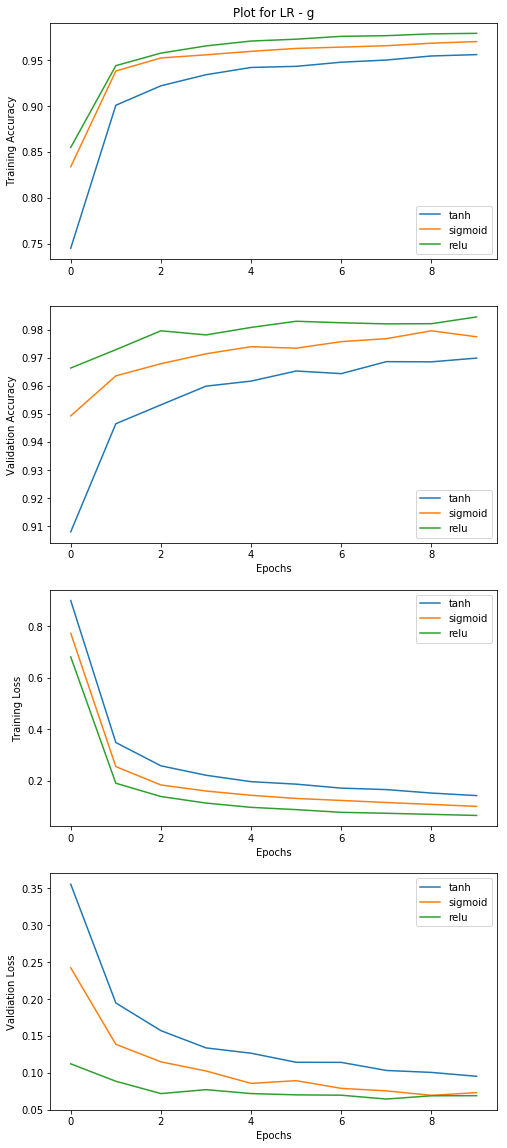

In [61]:
plotFor('g', 0)

In [64]:
encoded_y = one_hot_encode(y)

model = Sequential()
model.add(Conv2D(28, kernel_size = 3, activation = 'relu', input_shape =(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax', kernel_initializer='random_uniform',bias_initializer='zeros'))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(X, encoded_y,batch_size=128, epochs = 10)

y_pred = model.predict(X_test)
op = np.unravel_index(np.argmax(y_pred, axis=1), y_pred.shape)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, op[1])

Epoch 1/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.5232 - acc: 0.8694
Epoch 2/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.1725 - acc: 0.9493
Epoch 3/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.1261 - acc: 0.9627
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.1026 - acc: 0.9680
Epoch 5/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0918 - acc: 0.9708
Epoch 6/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0820 - acc: 0.9753
Epoch 7/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0757 - acc: 0.9762
Epoch 8/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0691 - acc: 0.9780
Epoch 9/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0666 - acc: 0.9796
Epoch 10/10
60000/60000 [==============================] - 10s 173us/step - loss: 

0.985

In [66]:
encoded_op = one_hot_encode(op[1])
np.savetxt('mnist.csv', encoded_op, fmt = '%i', delimiter = ",")